## Neural Network (Back Propagation Network)

* Dataset used is UCI ML dataset - <b>mushrooms.csv</b>.
* The above dataset is used to implement Back Propagation Network.

### About Dataset:

* This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom.

#### Objective:
> The goal of this dataset is to classify between edible (e) to poisonous (p) mushrooms.

<b>Attribute Information: </b>
1. class: edible=e, poisonous=p
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
5. bruises: bruises=t,no=f
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: attached=a,descending=d,free=f,notched=n
8. gill-spacing: close=c,crowded=w,distant=d
9. gill-size: broad=b,narrow=n
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
11. stalk-shape: enlarging=e,tapering=t
12. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
17. veil-type: partial=p,universal=u
18. veil-color: brown=n,orange=o,white=w,yellow=y
19. ring-number: none=n,one=o,two=t
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
22. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
23. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Loading the data and initial exploration

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
data["class"].unique()

array(['p', 'e'], dtype=object)

<b>The data is categorial, so convert it with LabelEncoder to transfer to ordinal.</b>

In [6]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [7]:
data.describe

<bound method NDFrame.describe of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0     

From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data, so remove it.

In [8]:
data=data.drop(["veil-type"],axis=1)

Checking for missing values.

In [9]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Splitting the Dataset into Train and Test

In [10]:
X=data.drop(['class'], axis=1)
Y=data['class']

In [11]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [12]:
mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train,Y_train)
y_pred = mlp.predict(X_test)

In [13]:
print("Back Propagation Network report \n", classification_report(Y_test, y_pred))

Back Propagation Network report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       829
           1       1.00      1.00      1.00       796

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



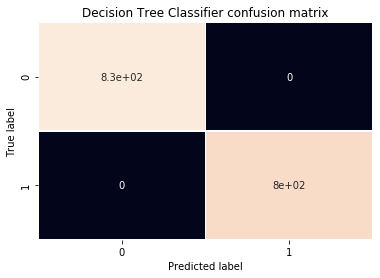

In [14]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');